In [1]:
import pandas as pd
import datetime
import matplotlib
now = datetime.datetime.now()

def transcode(x):
    if "Matteo F" in x:
        return "Matteo Francia"
    elif "Antonio" in x:
        return "Antonio Castagnola"
    elif "Laura" in x:
        return "Laura Tarsitano"
    elif "Gabriella" in x:
        return "Gabriella"
    elif "Silvia Pimpinella" in x:
        return "Silvia Severi"
    else:
        return x

In [2]:
df = pd.read_excel("data/" + str(now.year) + "-" + str(now.month) + "-b.xls", skiprows=5)
df = df.fillna(value=0)
df = df.replace("OK", 1).replace("?", 0)
df.columns = ["clown"] + [x for x in df.columns[1:]]
# df = df[["clown"] + [x for x in df.select_dtypes('number').columns if df[x].sum() >= 2]]
df = df[df["clown"].apply(lambda x: x != "Count" and x != "Conta")]
df = df[[x for x in df.columns if x == "clown" or df[x].sum() >= 2]]
df

,clown,PED AM.2,PED PM.18,PED PM.23
0,Matteo F,0,0,0
1,Laura,1,0,0
2,Annalisa,0,0,0
3,Mingrone Valentina,0,1,1
4,Valentina Bacchi,0,0,0
5,Tamara Rossi,0,0,0
6,Marco,0,1,0
7,Antonio Castagnola,0,0,1
8,Loretta,1,0,0
9,Chiara Faggiano,0,0,0


In [6]:
from os import listdir
from os.path import isfile, join


mypath = "data/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith(".xls")]
dff = pd.DataFrame()
for f in onlyfiles:
    df = pd.read_excel("data/" + f, skiprows=5)
    df = df.fillna(value=0)
    df = df.replace("OK", 1).replace("?", 0)
    df.columns = ["clown"] + [x for x in df.columns[1:]]
    df = df[df["clown"].apply(lambda x: x != "Count" and x != "Conta")]
    df = df[["clown"] + [x for x in df.select_dtypes('number').columns if df[x].sum() >= 2]]
    df["clown"] = df["clown"].apply(lambda x: transcode(x))
    df = df.melt(id_vars=["clown"])
    df["year"] = f.split("-")[0]
    df["month"] = f.split("-")[1].replace(".xls", "")
    df = df[df["value"].apply(lambda x: x > 0)]    
    dff = dff.append(df)

Turni coperti by month

<AxesSubplot:xlabel='year,month'>

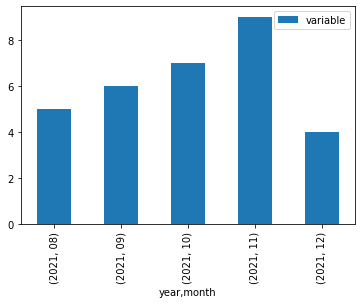

In [7]:
dff[["year", "month", "variable"]].groupby(by=["year", "month"]).nunique().plot(kind="bar")

Turni ogni mese by clown

<AxesSubplot:xlabel='clown,month,year'>

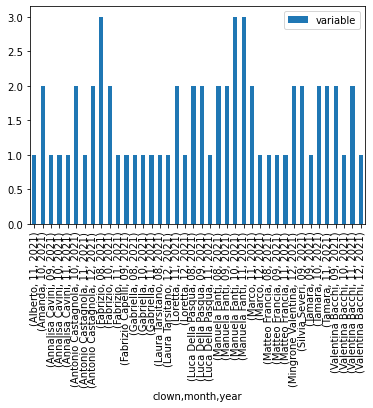

In [8]:
dff[["year", "month", "variable", "clown"]].groupby(by=["clown", "month", "year"]).count().plot(kind="bar")

Turni e mesi coperti da ogni clown

<AxesSubplot:xlabel='clown,year'>

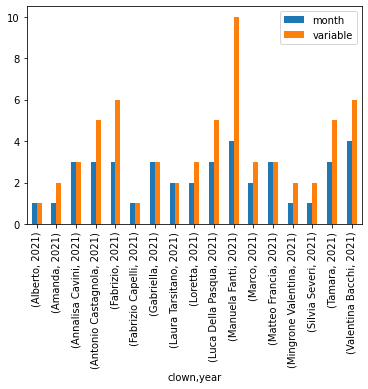

In [9]:
dff[["year", "month", "variable", "clown"]].groupby(by=["clown", "year"]).nunique().plot(kind="bar")

Clown attivi

In [10]:
dff["clown"].nunique()

17